In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta


df= pd.read_csv('processed_data.csv')

In [2]:
df

,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,time_stamp,action_type
0,34944,5,0,2116,-1,867,656,7334,1017,0
1,252288,3,0,3990,-1,825,662,5644,819,0
2,210048,3,1,4255,-1,866,1213,1573,711,2
3,210048,3,1,4255,-1,866,1213,1573,711,0
4,210048,3,1,4255,-1,866,1213,1573,711,0
...,...,...,...,...,...,...,...,...,...,...
4639,230015,4,0,4255,-1,866,1213,1573,710,2
4640,230015,4,0,4255,-1,866,1213,1573,710,0
4641,64895,3,0,3491,-1,860,1238,3969,529,0
4642,5759,6,0,4255,-1,866,1213,1573,815,2


<AxesSubplot:xlabel='age_range', ylabel='count'>

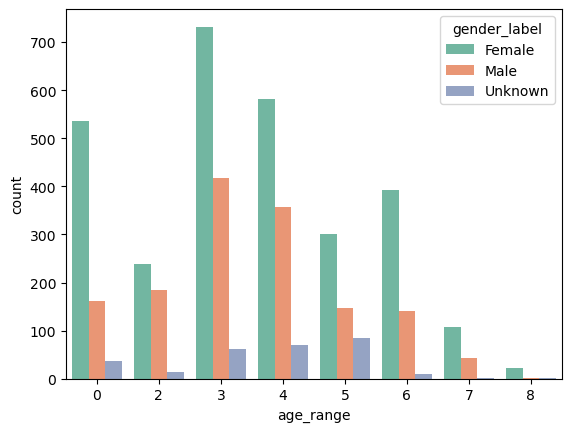

In [3]:
gender_labels = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['gender_label'] = df['gender'].replace(gender_labels)

sns.countplot(x='age_range', hue='gender_label', data=df, palette='Set2')

## Identifying the categories that have the highest spending by female customers.

Set of Catgegories in the given dataset :

In [4]:
distinct_categories = df['category_id'].unique()
distinct_categories

array([ 656,  662, 1213, 1112, 1389,  308, 1467,  276,  120,  898, 1591,
        302,  834, 1098, 1075,  407, 1528,  737,  267, 1397, 1147,  420,
        500,  639,  389,  563,  266,  351, 1181, 1238,  833, 1438, 1505,
       1023,  177, 1188,  555,  180,  614, 1401, 1656, 1095,   36,   35,
        464, 1553,  748, 1157,  278, 1228,  154, 1577,  946,  384,  844,
       1431,    2, 1142,  766,  812, 1486, 1611,  451, 1124,  756, 1326,
         11, 1293, 1657,  387,  815,  163,  895, 1271,  602,  641,  992,
        795, 1174, 1208,  184,   73,  628, 1518,  247,  825])

In [5]:
female_df = df[df['gender'] == 0]

grouped_female_customers = female_df.groupby('category_id')

# Iterate over each group and print the results
for category_id, group in grouped_female_customers:
    print('Category ID:', category_id)
    print(group.age_range,"\n")

Category ID: 2
890    6
Name: age_range, dtype: int64 

Category ID: 11
1284    0
1679    7
2734    4
2815    4
2816    4
2837    4
3286    4
3846    3
3880    3
4279    0
4281    4
Name: age_range, dtype: int64 

Category ID: 35
620     5
2618    4
2731    0
Name: age_range, dtype: int64 

Category ID: 36
611     4
612     4
1367    2
1549    3
3578    6
Name: age_range, dtype: int64 

Category ID: 73
3319    3
3320    3
Name: age_range, dtype: int64 

Category ID: 120
57      3
384     5
1504    3
4289    0
4562    3
Name: age_range, dtype: int64 

Category ID: 154
761    2
Name: age_range, dtype: int64 

Category ID: 177
340     4
767     4
3791    5
4431    6
4432    6
4433    6
4434    6
4548    2
Name: age_range, dtype: int64 

Category ID: 180
377     4
1119    0
3413    4
4426    4
4429    3
Name: age_range, dtype: int64 

Category ID: 184
3093    6
Name: age_range, dtype: int64 

Category ID: 266
173     6
385     4
4522    5
Name: age_range, dtype: int64 

Category ID: 267
22

### Top 5 categories in which females spend the most : 

In [13]:
category_count = {}
for category_id, group in grouped_female_customers:
    category_count[category_id] = len(group)

sorted_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)
sorted_categories

for i in range(5):
    category_id = sorted_categories[i][0]
    count = sorted_categories[i][1]
    print("Category ID:", category_id)
    print("Number of female customers:", count)
    print()

Category ID: 1213
Number of female customers: 1024

Category ID: 662
Number of female customers: 334

Category ID: 1389
Number of female customers: 224

Category ID: 898
Number of female customers: 149

Category ID: 656
Number of female customers: 142



### Top 5 categories in which females spend the most :

In [16]:
male_df = df[df['gender'] == 1]

grouped_male_customers = male_df.groupby('category_id')

category_count = {}
for category_id, group in grouped_male_customers:
    category_count[category_id] = len(group)

sorted_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)
sorted_categories

for i in range(5):
    category_id = sorted_categories[i][0]
    count = sorted_categories[i][1]
    print("Category ID:", category_id)
    print("Number of male customers:", count)
    print()

Category ID: 1213
Number of male customers: 783

Category ID: 407
Number of male customers: 82

Category ID: 898
Number of male customers: 62

Category ID: 1075
Number of male customers: 61

Category ID: 1098
Number of male customers: 59

